In [1]:
##Importing the Keras libraries and packages
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten

In [2]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [3]:
# Initialising the CNN
classifier = Sequential()


In [4]:
#Step 1 - Convulution
classifier.add(Convolution2D(32,3,3,input_shape=(64,64,3),activation="relu"))

In [5]:
# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size=(2,2)))

In [6]:
# Adding a second convolutional layer
classifier.add(Convolution2D(32,3,3, activation='relu'))

classifier.add(MaxPooling2D(pool_size=(2,2)))

In [7]:
# Step 3 - Flattening
classifier.add(Flatten())
# Step 4 - Full connection
classifier.add(Dense(units=128,activation='relu'))
classifier.add(Dense(units=1,activation='sigmoid'))

In [9]:
#Compiling the CNN
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,
                                 horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)
training_set=train_datagen.flow_from_directory('dataset/training_set',
                                               target_size=(64,64),
                                               batch_size=32,
                                               class_mode='binary')
test_set=test_datagen.flow_from_directory('dataset/test_set',
                                          target_size=(64,64),
                                          batch_size=32,
                                          class_mode='binary')
history=classifier.fit(x=training_set,batch_size=8000,epochs=25,
                       validation_data=test_set,validation_batch_size=2000)

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Epoch 1/25
250/250 [==============================] - 79s 302ms/step - loss: 0.6890 - accuracy: 0.5374 - val_loss: 0.6772 - val_accuracy: 0.5580
Epoch 2/25
250/250 [==============================] - 75s 299ms/step - loss: 0.6810 - accuracy: 0.5684 - val_loss: 0.6629 - val_accuracy: 0.6030
Epoch 3/25
250/250 [==============================] - 80s 319ms/step - loss: 0.6666 - accuracy: 0.5855 - val_loss: 0.6531 - val_accuracy: 0.6165
Epoch 4/25
250/250 [==============================] - 77s 306ms/step - loss: 0.6605 - accuracy: 0.6053 - val_loss: 0.6796 - val_accuracy: 0.5890
Epoch 5/25
250/250 [==============================] - 72s 288ms/step - loss: 0.6455 - accuracy: 0.6202 - val_loss: 0.7362 - val_accuracy: 0.5420
Epoch 6/25
250/250 [==============================] - 71s 283ms/step - loss: 0.6376 - accuracy: 0.6342 - val_loss: 0.6303 - val_accuracy: 0.6505
Epoch 7/25
250/250 [==========================

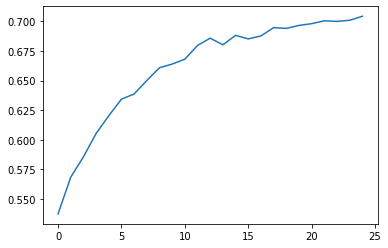

In [11]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],label='train')
plt.show()

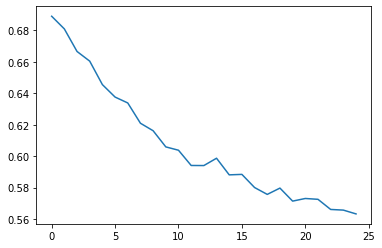

In [12]:
plt.plot(history.history['loss'],label='train')
plt.show()

In [17]:
import numpy as np
#to predict new images
def predict_image(imagepath,classifier):
    predict=tf.keras.preprocessing.image.load_img(imagepath,target_size=(64,64))
    predict_modified=tf.keras.preprocessing.image.img_to_array(predict)
    predict_modified=predict_modified/255
    predict_modified=np.expand_dims(predict_modified,axis=0)
    result=classifier.predict(predict_modified)
    if result[0][0]>=0.5:
        prediction='dog'
        probability=result[0][0]
        print("probability = "+ str(probability))
        print("Prediction = "+ prediction)
    else:
        prediction='cat'
        probability=1-result[0][0]
        print("probability = "+str(probability))
        print("Prediction = "+prediction)

In [18]:
predict_image("perro.jpg",classifier)

1/1 [==============================] - 1s 649ms/step
probability = 0.77137
Prediction = dog


In [19]:
predict_image("cat-coloring-page.png",classifier)

1/1 [==============================] - 0s 48ms/step
probability = 0.5130243
Prediction = dog


In [20]:
predict_image("perror.jpg",classifier)

1/1 [==============================] - 0s 36ms/step
probability = 0.92024803
Prediction = dog


In [21]:
predict_image("timthumb.jpg",classifier)

1/1 [==============================] - 0s 56ms/step
probability = 0.5624862909317017
Prediction = cat


In [22]:
predict_image("Cat03.jpg",classifier)

1/1 [==============================] - 0s 54ms/step
probability = 0.78288865
Prediction = dog
